# Preprocessing and cleaning of the data

In [221]:
import pandas as pd

In [222]:
data = pd.read_csv("../../data/data.csv")

Raw dataset

In [223]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,"COBRANÇA, VINDI",Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Manipulation of headers and columns

Merge Header with column names

    - PESSOA, PIPEDRIVE coulmns [A,R]
    - FUNIL ASSINATURA, PIPEDRIVE [S,X]
    - FUNIL ONBOARDING, PIPEDRIVE [Y, AH]
    - ATENDIMENTOS, AGENDA [AJ, AY]
    - WHOQOL [AZ, BD]
    - COMUNICARE [BE]
    - TWILIO [BF, BM]
    - COBRANÇA, VINDI [BN, BU]

In [224]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [225]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [226]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

Final result


In [227]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Understanding the dataset


In [228]:
data.shape

(1202, 73)

In [229]:
data.describe()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
count,1202,1191,1178,1178,1185,1183,1163,524,110,1202,...,579,579,252,252,252,252,252,252,252,1202
unique,1202,1100,5,4,24,196,932,47,81,422,...,16,575,21,36,4,33,10,7,16,1
top,250,1995-01-16,64,80,São Paulo,São Paulo,69730-000,412,2379,2023-06-12,...,1,2022-12-22 19:46:59,3,1,Cartão de crédito,88.00,0,0,0,FALSE
freq,1,8,602,830,570,197,96,281,9,43,...,240,3,35,27,227,99,150,218,218,1202


## Managing missing values


In [230]:
import missingno as msno

<Axes: xlabel='0'>

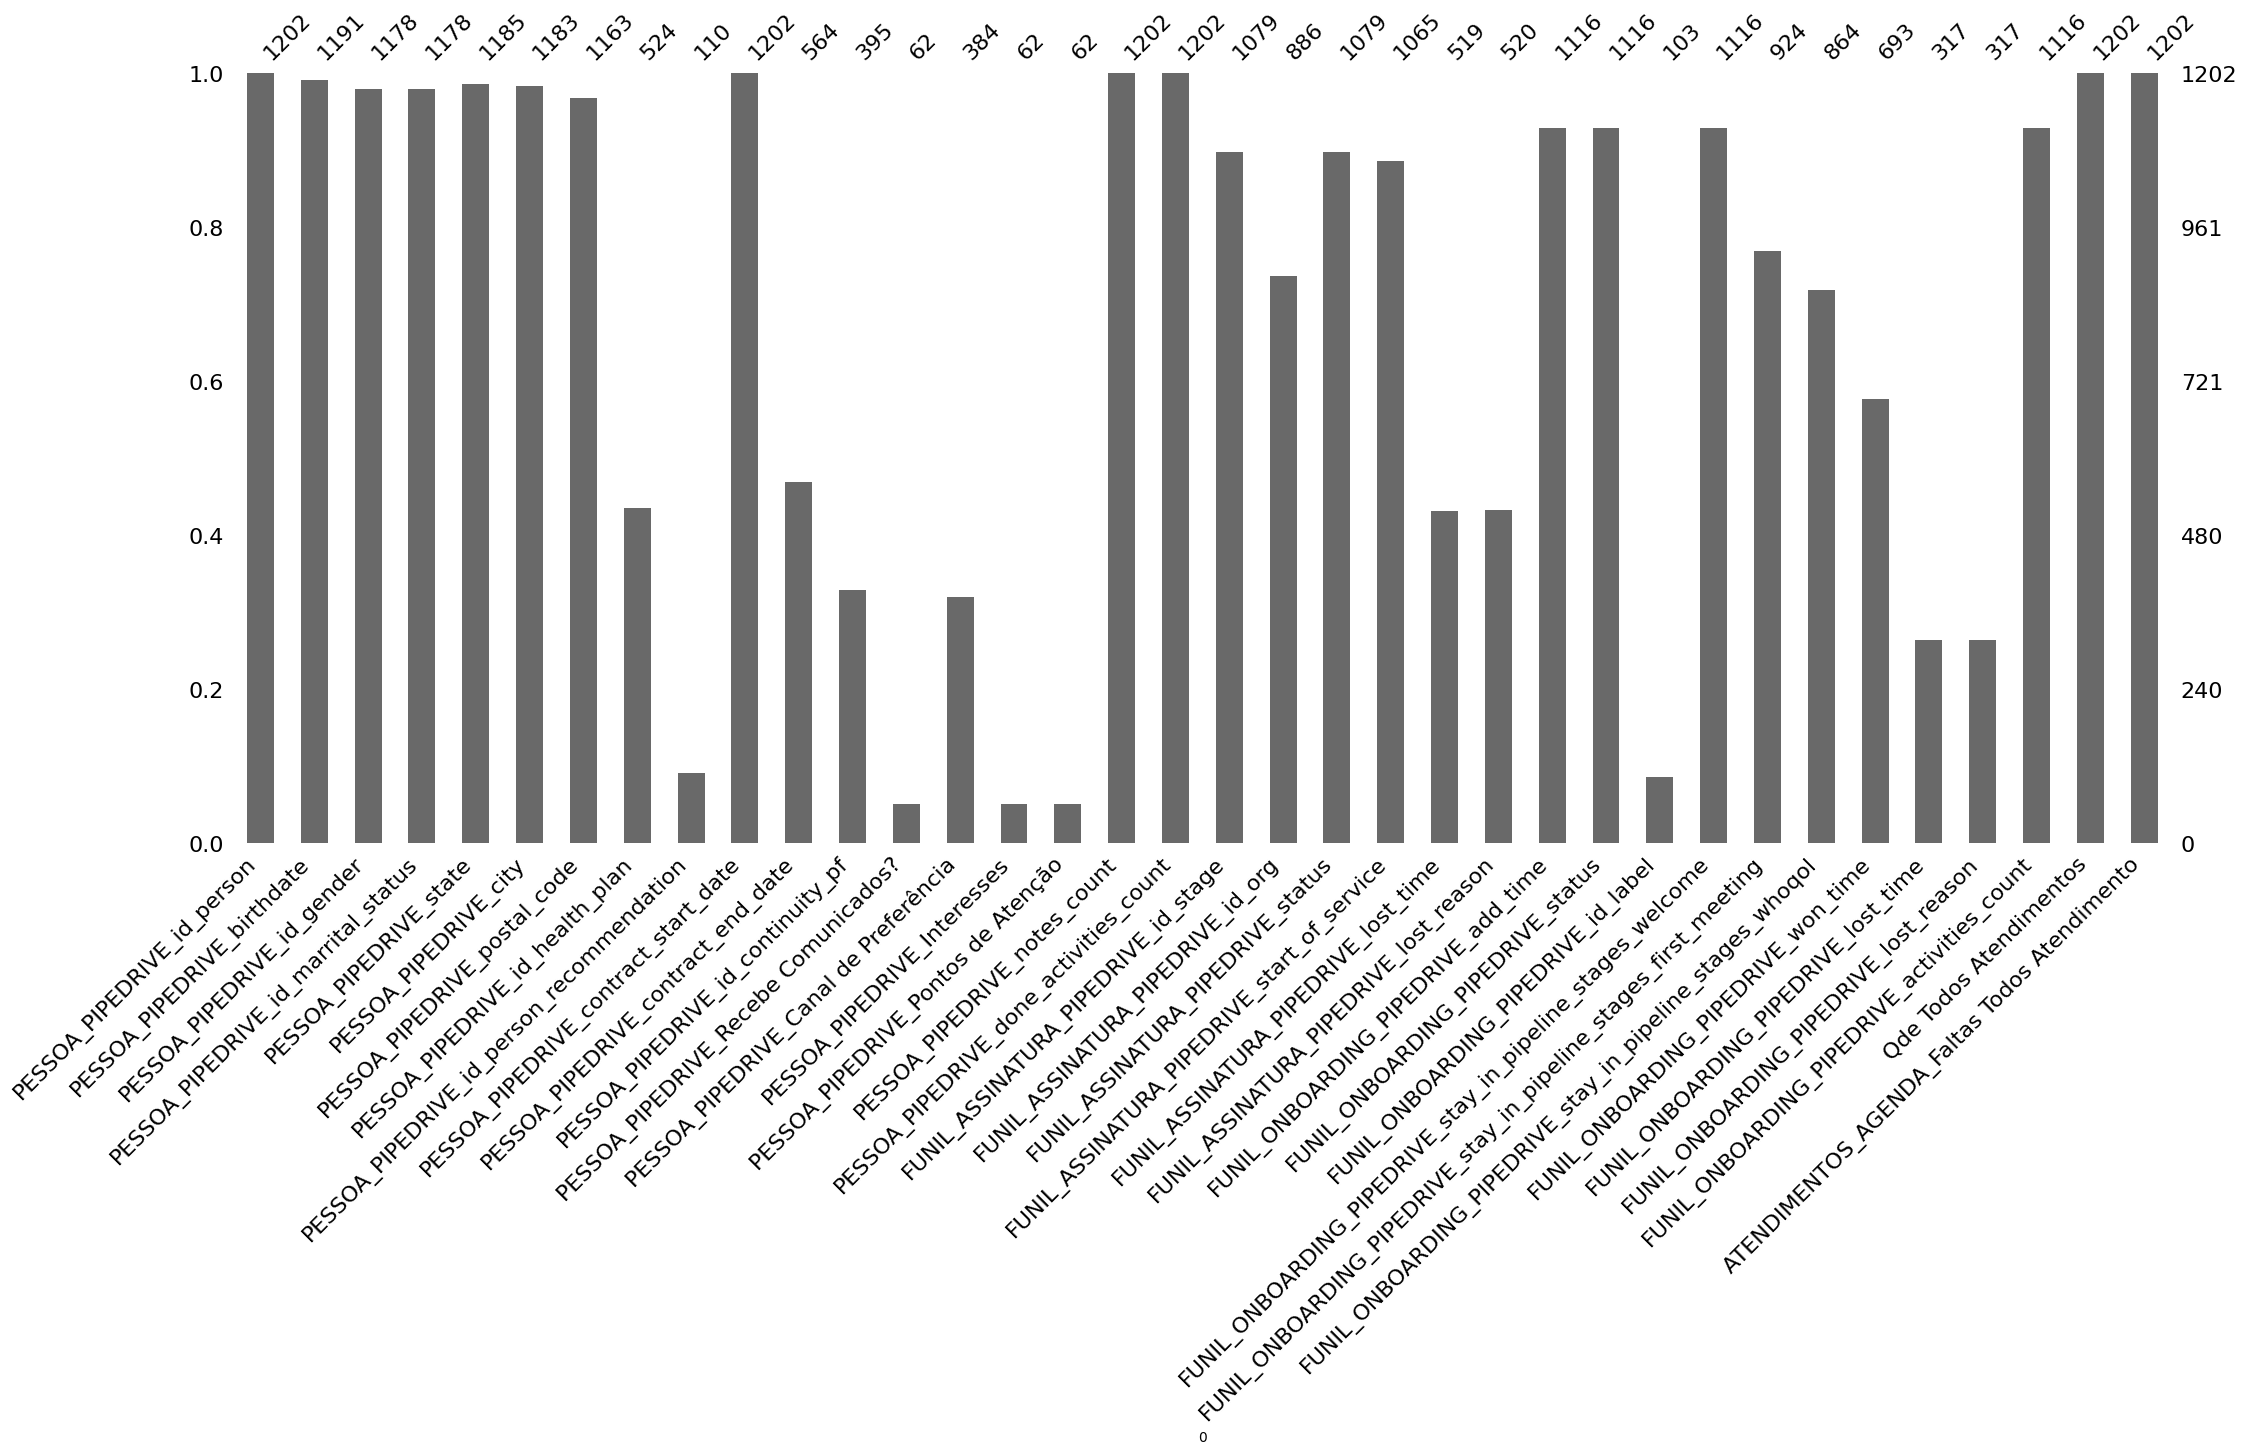

In [231]:
msno.bar(data.iloc[:,:36])

## Dropping columns with no information

    - PESSOA_PIPEDRIVE_id_person_recommendation
    - PESSOA_PIPEDRIVE_Recebe Comunicados?
    - PESSOA_PIPEDRIVE_Interesses
    - PESSOA_PIPEDRIVE_Pontos de Atenção
    - FUNIL_ONBOARDING_PIPEDRIVE_id_label

In [232]:
data = data.drop(["PESSOA_PIPEDRIVE_id_person_recommendation","PESSOA_PIPEDRIVE_Recebe Comunicados?", "PESSOA_PIPEDRIVE_Interesses", "PESSOA_PIPEDRIVE_Pontos de Atenção", "FUNIL_ONBOARDING_PIPEDRIVE_id_label"], axis=1)

<Axes: xlabel='0'>

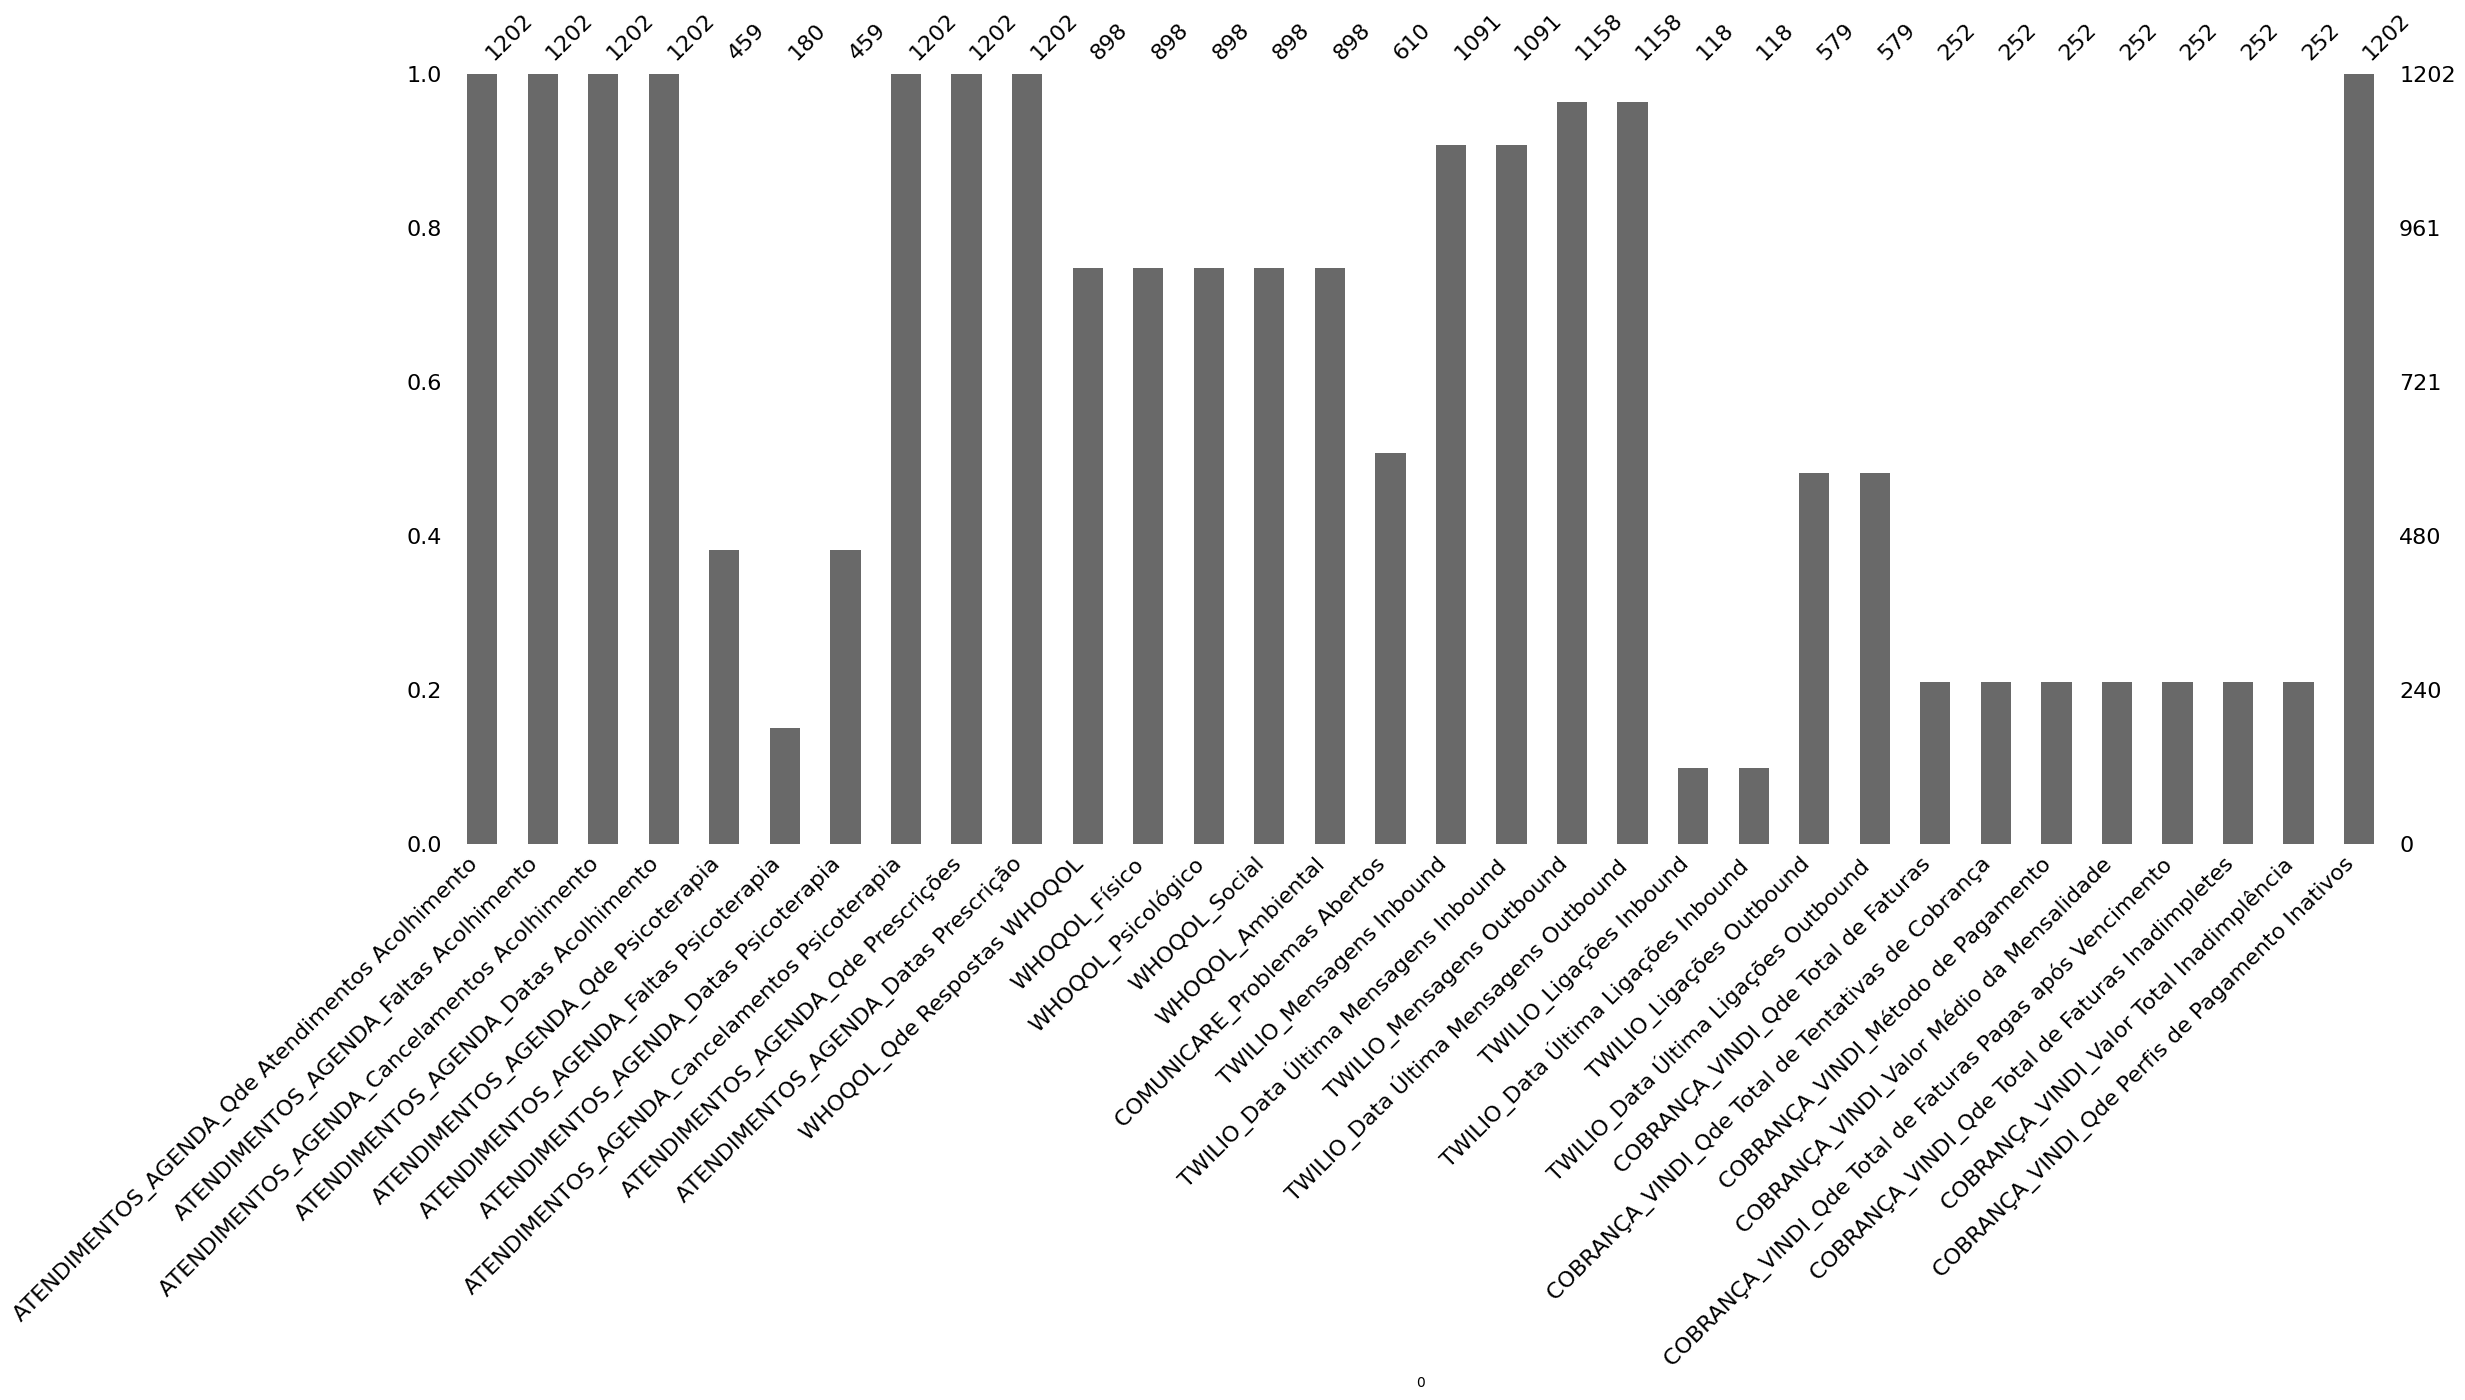

In [233]:
msno.bar(data.iloc[:,36:])